In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('Life Expectancy Data.csv')

In [8]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
#Returns shape of DataFrame i.e. number of rows and columns 
print("The size of the dataframe is:",df.shape)


The size of the dataframe is: (2938, 22)


In [10]:
#Returns a concise summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [11]:
# total number of null present in dataset
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:

#dropping the unnecessary column
df.drop(["Schooling","percentage expenditure","GDP"], axis=1, inplace=True)

In [13]:
# finding the null numerical variables
numerical_features = [ column_name for column_name in df.columns if df[column_name].dtype !='0']
df[numerical_features].isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
dtype: int64

In [14]:
# handling null/ missing values
null_numerical_features = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in null_numerical_features:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

In [15]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)
df.iloc[:,0] = labelencoder.fit_transform(df.iloc[:,0].values)

In [17]:
X = df.drop(df.columns[[3]],axis=1)
y = df[df.columns[[3]]]
y=y.astype('int')

Feature Selection

UNIVARIATE FEATURE SELECTION

In [18]:
#Univariate Feature Selection
# split data train 70 % and test 30 %
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
X_5_best= SelectKBest(chi2, k=5).fit(x_train, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, x_train.columns):
 if bool:
  new_feat.append(feature)
print("The best features are:{}".format(new_feat))

The best features are:['Adult Mortality', 'infant deaths', 'Measles ', 'under-five deaths ', 'Population']


MULTICOLLINEARITY

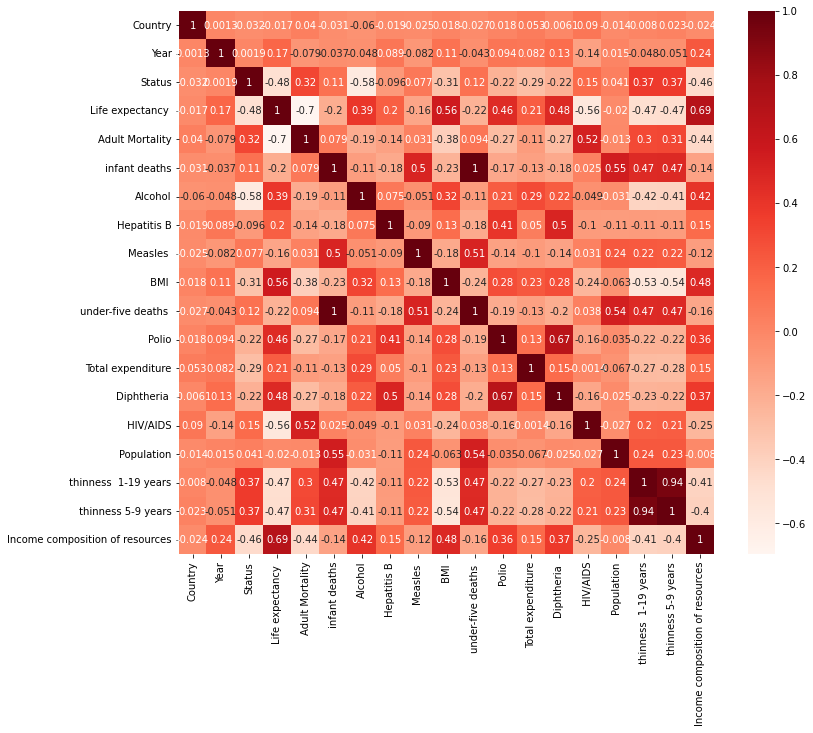

In [20]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
#Correlation with output variable
cor_target = abs(cor[df.columns[[3]]])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

                                 Life expectancy 
Country                                       NaN
Year                                          NaN
Status                                        NaN
Life expectancy                          1.000000
Adult Mortality                          0.696359
infant deaths                                 NaN
Alcohol                                       NaN
Hepatitis B                                   NaN
Measles                                       NaN
 BMI                                     0.559255
under-five deaths                             NaN
Polio                                         NaN
Total expenditure                             NaN
Diphtheria                                    NaN
 HIV/AIDS                                0.556457
Population                                    NaN
 thinness  1-19 years                         NaN
 thinness 5-9 years                           NaN
Income composition of resources          0.692483


LINEAR REGRESSION ON UNIVARIATE FEATURE SELECTION



In [33]:
x_train_uni= x_train[x_train.columns[[3,4,7,9,14]]]
x_test_uni= x_test[x_test.columns[[3,4,7,9,14]]]


In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_uni, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(x_test_uni)

In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.5466578994554807


LINEAR REGRESSION ON MULTICOLLINEARITY

In [41]:
x_train_mul= x_train[x_train.columns[[3,8,13,17]]]
x_test_mul= x_test[x_test.columns[[3,8,13,17]]]


In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_mul, y_train)

LinearRegression()

In [46]:
y_pred = regressor.predict(x_test_mul)

In [47]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7289195925564187
